In [1]:
# superposition.ipynb

# Cell 1 - Check qiskit install

import matplotlib.pyplot as plt
import numpy as np
import qiskit
from IPython.display import Math
from qiskit import Aer, QuantumCircuit, assemble, execute
from qiskit.quantum_info import Statevector
from qiskit.visualization import (
    array_to_latex,
    plot_bloch_multivector,
    plot_histogram,
    plot_state_qsphere,
)

for module, version in qiskit.__qiskit_version__.items():
    print(module, ":", version)

qiskit-terra : 0.20.2
qiskit-aer : 0.10.4
qiskit-ignis : 0.7.1
qiskit-ibmq-provider : 0.19.1
qiskit-aqua : None
qiskit : 0.36.2
qiskit-nature : 0.4.1
qiskit-finance : 0.3.2
qiskit-optimization : 0.3.2
qiskit-machine-learning : 0.4.0


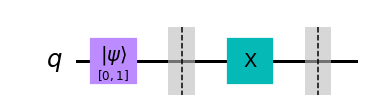

<IPython.core.display.Latex object>

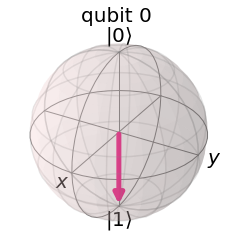

<IPython.core.display.Latex object>

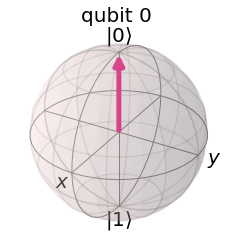

In [2]:
# Cell 2 - One qubit circuit on basis (single shot)

# Select a quantum computer to use
backend = Aer.get_backend("aer_simulator")

# Create a new circuit with one qubit
qc = QuantumCircuit(1)

# Initialize the qubit to a 1 state
qc.initialize([0, 1], 0)
qc.save_statevector("sv1")

# Apply a NOT gate (Pauli X gate)
qc.x(0)

# Save the final state
qc.save_statevector()

# Now run the circuit on the device
result = execute(qc, backend, shots=1).result()
counts = result.get_counts()

# Get the state vectors
sv1 = result.data(0)["sv1"]
sv2 = result.get_statevector()

display(qc.draw(output="mpl", scale=1.5))

display(array_to_latex(sv1, prefix="\\text{Statevector 1} = "))
display(plot_bloch_multivector(sv1))

display(array_to_latex(sv2, prefix="\\text{Statevector 2} = "))
display(plot_bloch_multivector(sv2))

In [ ]:
# Cell 3 - One qubit circuit not on basis (single shot)

backend = Aer.get_backend("aer_simulator")

qc = QuantumCircuit(1)

qc.initialize([0.5, np.sqrt(3) / 2], 0)
qc.save_statevector("sv1")

qc.x(0)
qc.save_statevector()

result = execute(qc, backend, shots=1).result()
counts = result.get_counts()

sv1 = result.data(0)["sv1"]
sv2 = result.get_statevector()

display(qc.draw(output="mpl", scale=1.5))

display(array_to_latex(sv1, prefix="\\text{Statevector 1} = "))
display(plot_bloch_multivector(sv1))

display(array_to_latex(sv2, prefix="\\text{Statevector 2} = "))
display(plot_bloch_multivector(sv2))

plot_histogram(counts)

In [ ]:
# Cell 4 - One qubit circuit not on basis (a few shots)

backend = Aer.get_backend("aer_simulator")

qc = QuantumCircuit(1)
qc.initialize([0.5, np.sqrt(3) / 2], 0)
qc.x(0)

qc.measure_all()

result = execute(qc, backend, shots=10).result()
counts = result.get_counts()

display(qc.draw(output="mpl", scale=1.5))

plot_histogram(counts)

In [ ]:
# Cell 5 - One qubit circuit not on basis (multiple shots)

backend = Aer.get_backend("aer_simulator")

qc = QuantumCircuit(1)
qc.initialize([0.5, np.sqrt(3) / 2], 0)
qc.x(0)

qc.measure_all()

result = execute(qc, backend, shots=10_000).result()
counts = result.get_counts()

plot_histogram(counts)

In [ ]:
# Cell 6 - One Pete Box (a single black ball)

backend = Aer.get_backend("aer_simulator")

qc = QuantumCircuit(1)
qc.initialize([0, 1], 0)
qc.save_statevector("sv1")
qc.h(0)
qc.save_statevector()

result = execute(qc, backend, shots=1).result()
counts = result.get_counts()

sv1 = result.data(0)["sv1"]
sv2 = result.get_statevector()

display(qc.draw(output="mpl", scale=1.5))

display(array_to_latex(sv1, prefix="\\text{Statevector 1} = "))
display(plot_bloch_multivector(sv1))

display(array_to_latex(sv2, prefix="\\text{Statevector 2} = "))
display(plot_bloch_multivector(sv2))

plot_histogram(counts)

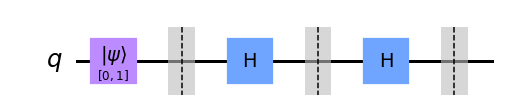

<IPython.core.display.Latex object>

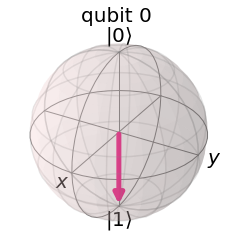

<IPython.core.display.Latex object>

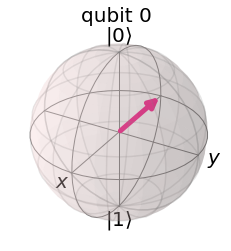

<IPython.core.display.Latex object>

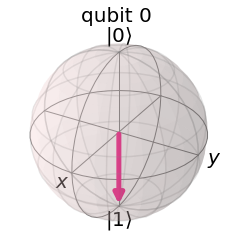

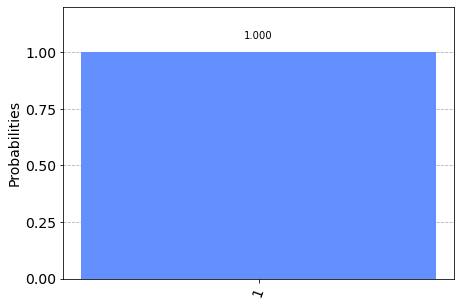

In [3]:
# Cell 7 - Two Pete Boxes (Single Black Ball)
# Note: This demonstrates the Hadamard Gate is Unitary

backend = Aer.get_backend("aer_simulator")

qc = QuantumCircuit(1)
qc.initialize([0, 1], 0)
qc.save_statevector("sv1")
qc.h(0)
qc.save_statevector("sv2")
qc.h(0)
qc.save_statevector()

result = execute(qc, backend, shots=1).result()
counts = result.get_counts()

sv1 = result.data(0)["sv1"]
sv2 = result.data(0)["sv2"]
sv3 = result.get_statevector()

display(qc.draw(output="mpl", scale=1.5))

display(array_to_latex(sv1, prefix="\\text{Statevector 1} = "))
display(plot_bloch_multivector(sv1))

display(array_to_latex(sv2, prefix="\\text{Statevector 2} = "))
display(plot_bloch_multivector(sv2))

display(array_to_latex(sv3, prefix="\\text{Statevector 3} = "))
display(plot_bloch_multivector(sv3))

plot_histogram(counts)

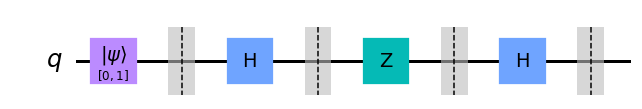

<IPython.core.display.Latex object>

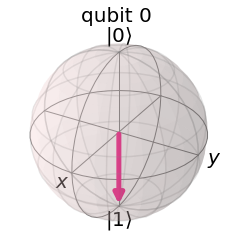

<IPython.core.display.Latex object>

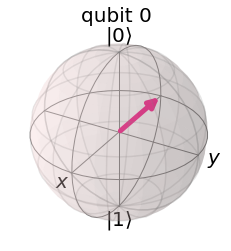

<IPython.core.display.Latex object>

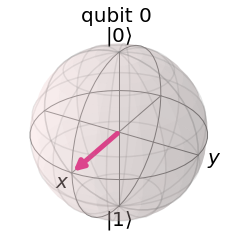

<IPython.core.display.Latex object>

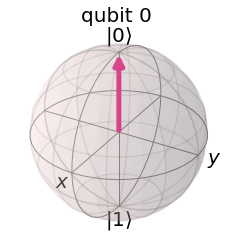

In [4]:
# Cell 8 - Gate Equivalence
# This demonstrates the identity X = HZH

backend = Aer.get_backend("aer_simulator")

qc = QuantumCircuit(1)

qc.initialize([0, 1], 0)
qc.save_statevector("sv1")
qc.h(0)
qc.save_statevector("sv2")
qc.z(0)
qc.save_statevector("sv3")
qc.h(0)
qc.save_statevector()

result = execute(qc, backend, shots=1).result()
counts = result.get_counts()

sv1 = result.data(0)["sv1"]
sv2 = result.data(0)["sv2"]
sv3 = result.data(0)["sv3"]
sv4 = result.get_statevector()


display(qc.draw(output="mpl", scale=1.5))

display(array_to_latex(sv1, prefix="\\text{Statevector 1} = "))
display(plot_bloch_multivector(sv1))

display(array_to_latex(sv2, prefix="\\text{Statevector 2} = "))
display(plot_bloch_multivector(sv2))

display(array_to_latex(sv3, prefix="\\text{Statevector 3} = "))
display(plot_bloch_multivector(sv3))

display(array_to_latex(sv4, prefix="\\text{Statevector 4} = "))
display(plot_bloch_multivector(sv4))